In [11]:
# import all necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Initialize 3-Qubit Quantum Circuit
circuit = QuantumCircuit(3)
circuit.x(0) # Apply pauli-x gate to qubit
circuit.h(1) # Apply hadamard gate to qubit
circuit.ry(pi/3, 2) # Apply y-rotation gate to qubit
circuit.measure_all()
circuit.draw()

┌───┐    ░ ┌─┐      
   q_0: ───┤ X ├────░─┤M├──────
           ├───┤    ░ └╥┘┌─┐   
   q_1: ───┤ H ├────░──╫─┤M├───
        ┌──┴───┴──┐ ░  ║ └╥┘┌─┐
   q_2: ┤ Ry(π/3) ├─░──╫──╫─┤M├
        └─────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

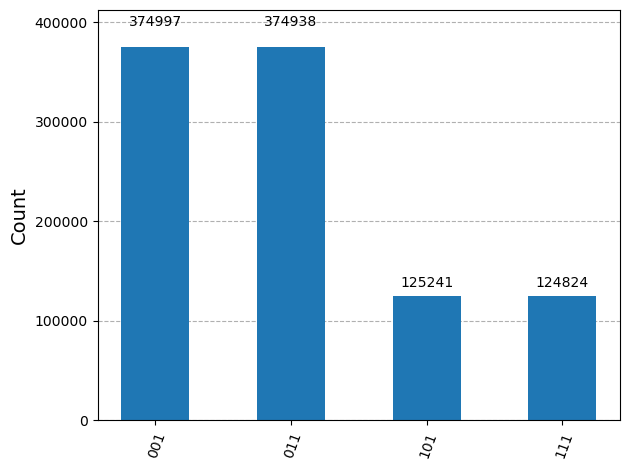

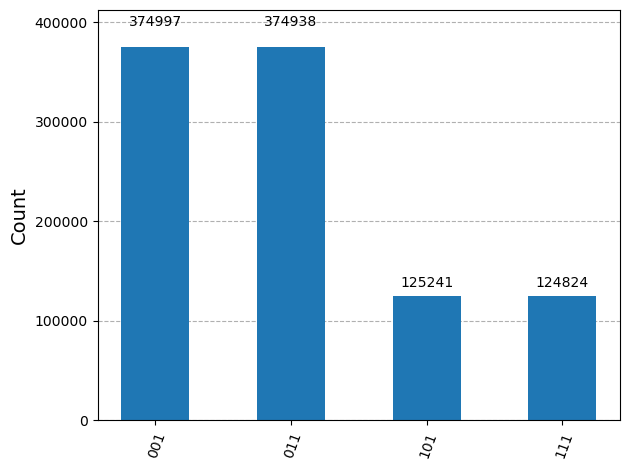

In [13]:
# Import simulator backend
from qiskit.providers.basic_provider import BasicProvider

# Get a basic simulator backend
simulator = BasicProvider().get_backend('basic_simulator')

# Transpile circuit for the backend
compiled_circuit = transpile(circuit, simulator)

# Run the circuit 1 million times
result = simulator.run(compiled_circuit, shots=1000000).result()

# Plot measurement result histogram
plot_histogram(result.get_counts())